# Filter methods | Statistical measures

Content: 
1. Mutual information
2. Chi-square
3. Univariate feature selection
4. Putting All Together: Basics Filter Methods + Filter statistical tests => Pipelene


## 1. Mutual information

The mutual information measures the reduction in uncertainty in variable A when variable B is known. 

To select variables, the key point to consider is the mutual information between the predictor variables and the target. Higher mutual information values, indicate little uncertainty about the target Y given the predictor X. The smaller the value of MI, the less information to be infer from the feature about the target

((Using Scikit-learn, we can determine the mutual information between a variable and the target using the mutual_info_classif or mutual_info_regression for binary or continuous targets.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

from sklearn.feature_selection import SelectKBest, SelectPercentile

### 1.1 Classification

In [2]:
# load dataset

data = pd.read_csv('../dataset_2.csv')
data.shape

(50000, 109)

In [3]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [4]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

#### Determine Mutual Information

In [5]:
# calculate the mutual information between the variables and the target

# the smaller the value, the less information to be infer from
# the feature about the target

mi = mutual_info_classif(X_train, y_train)
mi

array([0.00000000e+00, 3.66501614e-03, 0.00000000e+00, 1.05242835e-03,
       3.64769893e-04, 5.22189889e-03, 4.81455561e-03, 2.98082133e-03,
       0.00000000e+00, 0.00000000e+00, 6.01316490e-04, 8.42004808e-04,
       1.07150823e-03, 5.02410045e-03, 0.00000000e+00, 1.56555686e-02,
       0.00000000e+00, 0.00000000e+00, 2.40775696e-04, 0.00000000e+00,
       3.97314147e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.75718438e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.49233259e-03, 1.50573185e-03, 0.00000000e+00, 0.00000000e+00,
       4.71648754e-03, 1.69578742e-02, 0.00000000e+00, 2.07313709e-03,
       0.00000000e+00, 1.84186408e-03, 7.28095191e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.52603497e-05, 3.08632860e-03,
       2.74315430e-04, 1.91165646e-03, 0.00000000e+00, 1.08019450e-02,
       0.00000000e+00, 3.45424755e-04, 0.00000000e+00, 3.08271528e-03,
       0.00000000e+00, 3.24394422e-03, 4.07032733e-02, 1.52132521e-03,
      

Text(0, 0.5, 'Mutual Information')

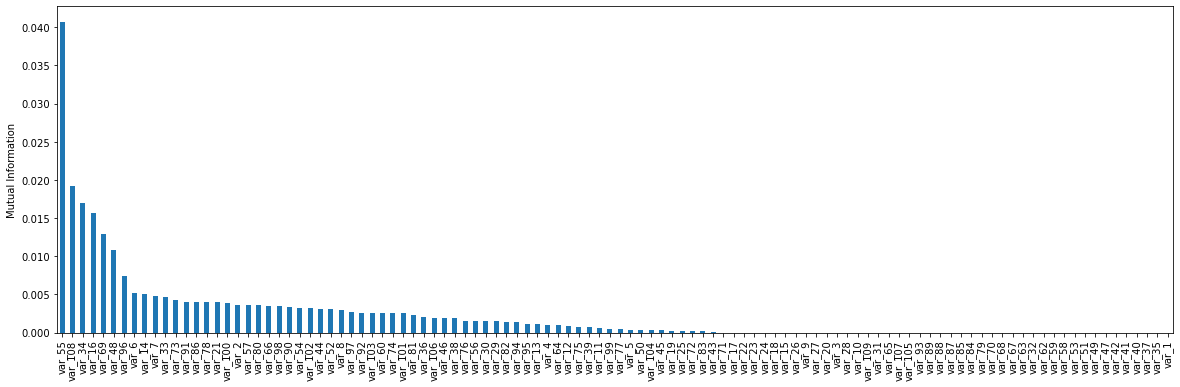

In [6]:
# plotting ther mi value of each feature (sorted)

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

There are a few features (left of the plot) with higher mutual information values. There are also features with almost zero MI values on the right of the plot.

Once we find the mutual information values, to select features we need to determine a threshold above which a feature will be selected.

There are a few ways in which this can be done:

- Select top k features, where k is an arbitrary number of features (Scikit-learn transformer **SelectKBest**)

- Select features in the top n percentile, where n is again an arbitrary number (Sklearn's **SelectPercentile**)

- Select all features above a certain threshold of MI, arbitrarily decided (manually).

### Select top k features based on MI

In [7]:
# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# display features to retain
X_train.columns[sel_.get_support()]

Index(['var_6', 'var_7', 'var_14', 'var_16', 'var_33', 'var_34', 'var_55',
       'var_69', 'var_96', 'var_108'],
      dtype='object')

In [8]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

### 1.2 Regression

In [9]:
# load dataset
data = pd.read_csv('../houseprice.csv')
data.shape

(1460, 81)

In [10]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for a simplicity sake(and as so it is a demo notebook), only numerical variables
# select numerical columns is used

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [11]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [12]:
## fill missing values

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

### Determine Mutual Information

Text(0, 0.5, 'Mutual Information')

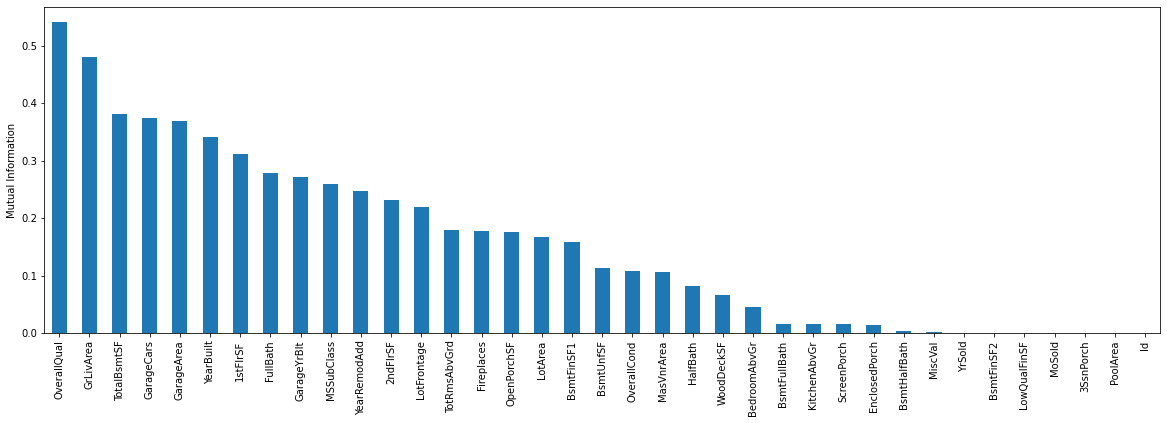

In [13]:
# determine the mutual information
mi = mutual_info_regression(X_train, y_train)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.ylabel('Mutual Information')

### Select top 10th percentile features

In [14]:
# select the features in the top percentile
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train, y_train)

# display the features to retain
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')

In [15]:
# remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

X_train

array([[7.000e+00, 1.057e+03, 2.034e+03, 2.000e+00],
       [6.000e+00, 1.291e+03, 1.291e+03, 2.000e+00],
       [5.000e+00, 8.580e+02, 8.580e+02, 0.000e+00],
       ...,
       [6.000e+00, 0.000e+00, 1.902e+03, 2.000e+00],
       [7.000e+00, 1.374e+03, 1.557e+03, 2.000e+00],
       [7.000e+00, 1.195e+03, 1.839e+03, 2.000e+00]])

## 2. Chi-square

Compute chi-squared stats between each non-negative feature and class. 

This score should be used to evaluate categorical variables in a classification task.

Chi2 returns 2 arrays, one contains the F-Scores which are then evaluated against the chi2 distribution to obtain the p-value. The p-values are in the second array.

Contrarily to MI, where we were interested in the higher MI values, for the chi2, the smaller the p_value the more significant the feature is to predict the target.

In [16]:
from sklearn.feature_selection import chi2

In [17]:
# load dataset

data = pd.read_csv('../titanic.csv')
data.shape

(1309, 14)

In [18]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


The categorical variables in the titanic are pclass, sex and embarked

In [19]:
# first, encode the labels of the categories into numbers

# for Sex / Gender
data['sex'] = np.where(data['sex'] == 'male', 1, 0)

# for Embarked
ordinal_label = {k: i for i, k in enumerate(data['embarked'].unique(), 0)}
data['embarked'] = data['embarked'].map(ordinal_label)

# pclass is already ordinal

In [20]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data[['pclass', 'sex', 'embarked']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 3), (393, 3))

In [21]:
# calculate the chi2 p_value between each of the variables
# and the target

f_score = chi2(X_train.fillna(0), y_train)

# the 2 arrays of values
f_score

(array([27.18283095, 95.93492132,  8.51621324]),
 array([1.85095118e-07, 1.18722647e-22, 3.51996172e-03]))

In [22]:
# get p-values of each feature

pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=True)

sex         1.187226e-22
pclass      1.850951e-07
embarked    3.519962e-03
dtype: float64

From the result above, Sex is the most important feature, as it has the smallest p-value.

Here, chi2 determines the predictive value of 3 categorical variables only. If the dataset contained several categorical variables, it could be combined with SelectKBest or SelectPercentile, as was done with MI to select the top k features, or the features in the top n percentile, based on the chi2 p-values.

In [23]:
# select the k=1 feature
sel_ = SelectKBest(chi2, k=1).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index(['sex'], dtype='object')

In [24]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

## 3. Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests (ANOVA). The methods estimate the degree of linear dependency between two random variables. In this case, any of the predictor variables and the target. 

ANOVA assumes a linear relationship between the feature and the target and that the variables follow a Gaussian distribution. If this is not true, the result of this test may not be useful.

This method is usually used in such fields as biology, genetics, medicine analysis etc. In the finance / fraud detection field it is rarely used.

This may not always be the case for the variables in your dataset, so if looking to implement these procedures, it is needed to corroborate these assumptions. For the sake of gaining experience and since this notebook is demo, I will assume that the variables show a linear relationship with the target and that they are normally distributed.

In [25]:
from sklearn.feature_selection import f_classif, f_regression

### 3.1 Classification

In [26]:
# load dataset
data = pd.read_csv('../dataset_2.csv')
data.shape

(50000, 109)

In [27]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [28]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

#### Perform univariate anova

In [29]:
# calculate the univariate statistical measure between
# each of the variables and the target

# similarly to chi2, the output is one array with f-scores
# and one array with the p-values

univariate = f_classif(X_train, y_train)

univariate

(array([2.92073990e-01, 3.67738039e+01, 1.30411853e+01, 1.17574360e+01,
        1.41563181e+01, 3.06381672e+01, 2.02234060e+01, 2.96271569e+00,
        2.29045228e-01, 3.77443721e+00, 2.90430896e+00, 1.91250548e+01,
        5.05376700e+01, 1.19013857e+01, 2.07311280e+01, 7.33476852e+02,
        4.27044609e+01, 1.27667244e+01, 6.44432030e+00, 1.19060034e+01,
        2.73829670e+02, 3.90587287e+00, 1.12131044e+01, 3.51833011e+00,
        7.22171922e-01, 4.33080273e+01, 1.11696498e+00, 1.35149019e+01,
        7.04378672e-01, 7.82273154e+01, 1.07853079e+01, 5.07871810e+00,
        1.88154600e+00, 5.39927733e+02, 3.35223341e-02, 7.88844093e+00,
        2.39605100e+01, 2.36349439e+01, 5.53456743e+00, 2.23455847e-04,
        1.62264425e+00, 2.64838234e+00, 7.22501472e+00, 1.25555915e+00,
        1.32941890e+01, 3.83273241e+00, 3.27938257e+00, 1.98713697e+02,
        2.76343404e-02, 9.87511329e+00, 1.15466653e+01, 7.89411872e+00,
        2.45008055e+00, 2.00266136e+00, 2.16675637e+03, 1.264599

<AxesSubplot:>

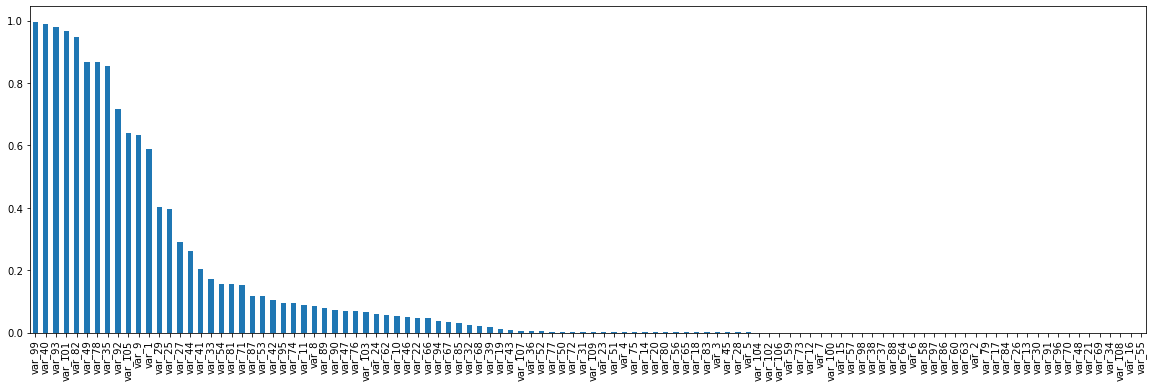

In [30]:
# plotting feature the p-value (sorted)

univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6))

The smaller the p_value the more predictive the feature is. Features on the left of the plot are very bad at predicting the target. The most predictive features are on the right of the plot.

Again. there are a few ways in which this can be done: top k features, the top n percentile, below a certain threshold.

#### Select top k=10 features based of univariate anova

In [31]:
# select the top 10 features
sel_ = SelectKBest(f_classif, k=10).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

Index(['var_16', 'var_21', 'var_34', 'var_48', 'var_55', 'var_69', 'var_70',
       'var_91', 'var_96', 'var_108'],
      dtype='object')

In [32]:
# remove unwanted features from the dataset

X_train = sel_.transform(X_train)

X_train.shape

(35000, 10)

### 3.2 Regression

(In practice, feature selection should be done after data pre-processing, so ideally, all the categorical variables are encoded into numbers, and then you can assess how deterministic they are of the target.

Here for simplicity, only numerical variables select numerical columns is used)

In [33]:
# load dataset
data = pd.read_csv('../houseprice.csv')
data.shape

(1460, 81)

In [34]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

#### Perform univariate anova

<AxesSubplot:>

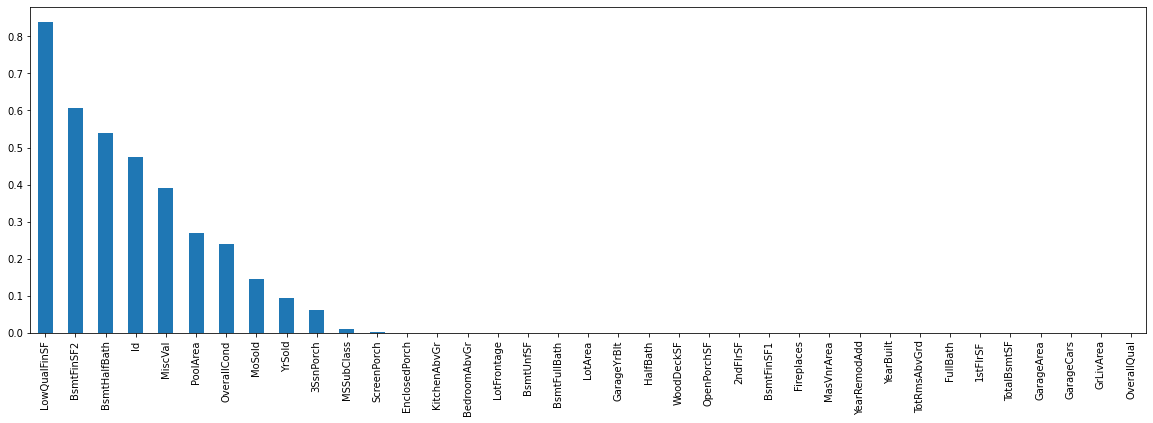

In [36]:
# univariate anova
univariate = f_regression(X_train.fillna(0), y_train)

# plot values
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20,6))

#### Select features in top 10th percentile

In [37]:
# select features in top 10th percentile
sel_ = SelectPercentile(f_regression,
                        percentile=10).fit(X_train.fillna(0), y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [38]:
# select features / discard unwanted features

X_train = sel_.transform(X_train.fillna(0))
X_train.shape

(1022, 4)

## 4. Putting All Together: Basics Filter Methods + Filter statistical tests => Pipelene

Here, from the imported dataset, 4 datasets are derived:

- the original
- after basic filters (removing constant and quasi-constant, duplicated features)
- after basic filters + removing correlated features
- after basic filters + removing correlated features + filter methods - univariate roc-auc

I will also compare the ML performance of each of 4 datasets.

In [39]:
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

In [40]:
# load the Santander customer satisfaction dataset from Kaggle

data = pd.read_csv('../dataset_1.csv')
data.shape

(50000, 301)

In [41]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [42]:
# a copy of the dataset with all the variables
# to compare the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
X_test_original = X_test.copy()

### Remove constant and quasi-constant features

In [43]:
sel = VarianceThreshold(threshold=0.01)

sel.fit(X_train)
sum(sel.get_support())

215

In [44]:
features_to_keep = X_train.columns[sel.get_support()]

In [45]:
# remove the features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 215), (15000, 215))

In [46]:
# sklearn transformations lead to numpy arrays,
# here, the arrays -- back to dataframes

X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

### Remove duplicated features

In [47]:
# check for duplicated features in the training set

duplicated_feat = []
for i in range(0, len(X_train.columns)):

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

10

In [48]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 205), (15000, 205))

In [49]:
# a copy of the dataset except constant and duplicated variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

### Remove correlated features

In [50]:
# find and remove correlated features
def correlation(dataset, threshold):
    
    col_corr = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)))

correlated features:  93


In [51]:
# remove correlated features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [52]:
# keep a copy of the dataset
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

### Select features based of anova

In [53]:
sel_ = SelectKBest(f_classif, k=20).fit(X_train, y_train)

# capture selected feature names
features_to_keep = X_train.columns[sel_.get_support()]

# select features
X_train_anova = sel_.transform(X_train)
X_test_anova = sel_.transform(X_test)

# numpy array to dataframe
X_train_anova = pd.DataFrame(X_train_anova)
X_train_anova.columns = features_to_keep

X_test_anova = pd.DataFrame(X_test_anova)
X_test_anova.columns = features_to_keep

X_train_anova.shape, X_test_anova.shape

((35000, 20), (15000, 20))

### Compare the performance in machine learning algorithms

In [54]:
# a function to build random forests and
# compare its performance in train and test sets

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [55]:
# original
run_randomForests(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.807612232524249
Test set
Random Forests roc-auc: 0.7868832427636059


In [56]:
# filter methods - basic
run_randomForests(X_train_basic_filter,
                  X_test_basic_filter,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.810290026780428
Test set
Random Forests roc-auc: 0.7914020645941601


In [57]:
# filter methods - correlation
run_randomForests(X_train_corr,
                  X_test_corr,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8066004772684517
Test set
Random Forests roc-auc: 0.7859521124929707


In [58]:
# filter methods - univariate roc-auc
run_randomForests(X_train_anova,
                  X_test_anova,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8181634778452822
Test set
Random Forests roc-auc: 0.7994720109870546


The 20 features selected using the univariate anova are doing all right, as the final model does not show a decrease in performance compared to that one using all features.

In [59]:
# a function to build logistic regression
# and compare its performance in train and test sets

def run_logistic(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(penalty='l1', random_state=44, max_iter=1000, solver='liblinear')
    logit.fit(X_train, y_train)
    
    print('Train set')
    pred = logit.predict_proba(scaler.transform(X_train))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = logit.predict_proba(scaler.transform(X_test))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [60]:
# original
run_logistic(X_train_original,
             X_test_original,
             y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7430426412785165
Test set
Logistic Regression roc-auc: 0.7514165331434336


In [61]:
# filter methods - basic

run_logistic(X_train_basic_filter,
             X_test_basic_filter,
             y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7410468829538979
Test set
Logistic Regression roc-auc: 0.7489081614486635


In [62]:
# filter methods - correlation

run_logistic(X_train_corr,
             X_test_corr,
             y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7307283864065812
Test set
Logistic Regression roc-auc: 0.7227227435986561


In [63]:
# filter methods - univariate anova

run_logistic(X_train_anova,
             X_test_anova,
             y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7385311277520487
Test set
Logistic Regression roc-auc: 0.7256599156189685


For logistic regression, we see that when we removed correlated features, we seemed to have removed some features that were good at predicting the target, as the performance dropped a bit. That might be for anova is characterixed as good for linear regressions.